In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
import matplotlib
import matplotlib.pyplot as plt

def set_pandas_display_options(max_rows=50, max_columns=50):
    """
    Sets the pandas display options for showing the number of rows and columns.
    
    Parameters:
    max_rows (int): The maximum number of rows to display in the DataFrame.
    max_columns (int): The maximum number of columns to display in the DataFrame.
    """
    pd.set_option('display.max_rows', max_rows)
    pd.set_option('display.max_columns', max_columns)

def suppress_warnings():
    """
    Suppresses warnings to avoid clutter in the output.
    """
    warnings.filterwarnings('ignore')

def initialize_plotting():
    """
    Initializes matplotlib and seaborn settings for better visualizations.
    """
    sns.set(style="whitegrid")
    matplotlib.rcParams['figure.figsize'] = (10, 6)

# Example of calling the functions
set_pandas_display_options()
suppress_warnings()
initialize_plotting()


In [21]:
df = pd.read_csv(r'C:\Users\eev\Documents\Udacity\archive\survey_results_public.csv')

In [22]:
def get_dataframe_shape(df):
    """
    Returns the shape of a DataFrame.
    
    Parameters:
    df (pd.DataFrame): The DataFrame whose shape is to be queried.
    
    Returns:
    tuple: A tuple containing the number of rows and columns of the DataFrame.
    """
    return df.shape

# Example: Calling the function to get the shape of the DataFrame
shape = get_dataframe_shape(df)
print(f"Shape of DataFrame: {shape}")


Shape of DataFrame: (51392, 154)


# 1 Business Understanding

This Use Case is made for this Course, but to clarify. This Data is conducted by StackOverflow to gather Information from People all over the World  <br>
its covering information about the Jobs what languages they programm in and even the Job sattisfaction.  <br>
my interest is to see if the Satisfaction depends on the income and on the experience (time) they work in the field  <br>
also i wanna know if the gender actually plays a role  <br>
and at last i wanna see what countries make the most and if its related to what countries think they make the worst income  <br>
  <br>  <br>
  # Question 1   <br>
  Is There a difference in pay by the years in the field or is there a point where it even stops increasing
  # Question 2   <br>
  Does the stereotype "women earn less" actually exist? lets check the pay by Genders
  # Question 3   <br>
  At Last is the pay influenced by Countries and which of those Countries is the most unhappy with their Pay


In [23]:
df.head(5)

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,CompanyType,YearsProgram,YearsCodedJob,YearsCodedJobPast,DeveloperType,WebDeveloperType,MobileDeveloperType,NonDeveloperType,CareerSatisfaction,JobSatisfaction,ExCoderReturn,ExCoderNotForMe,ExCoderBalance,ExCoder10Years,ExCoderBelonged,...,StackOverflowFoundAnswer,StackOverflowCopiedCode,StackOverflowJobListing,StackOverflowCompanyPage,StackOverflowJobSearch,StackOverflowNewQuestion,StackOverflowAnswer,StackOverflowMetaChat,StackOverflowAdsRelevant,StackOverflowAdsDistracting,StackOverflowModeration,StackOverflowCommunity,StackOverflowHelpful,StackOverflowBetter,StackOverflowWhatDo,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,NaN,2 to 3 years,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,At least once each week,Haven't done at all,Once or twice,Haven't done at all,Haven't done at all,Several times,Several times,Once or twice,Somewhat agree,Strongly disagree,Strongly disagree,Strongly agree,Agree,Strongly agree,Strongly agree,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,"Privately-held limited company, not in startup...",9 to 10 years,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Several times,Several times,Once or twice,Once or twice,Once or twice,Haven't done at all,Several times,At least once each week,Disagree,Strongly disagree,Strongly disagree,Strongly agree,Agree,Strongly agree,Strongly agree,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",Publicly-traded corporation,20 or more years,20 or more years,NaN,Other,NaN,NaN,NaN,8.0,9.0,NaN,NaN,NaN,NaN,NaN,...,Once or twice,Haven't done at all,Haven't done at all,Haven't done at all,Haven't done at all,Haven't done at all,At least once each day,At least once each day,Disagree,Disagree,Strongly disagree,Strongly agree,Agree,Agree,Agree,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",Non-profit/non-governmental organization or pr...,14 to 15 years,9 to 10 years,NaN,NaN,NaN,NaN,Data scientist,6.0,3.0,NaN,NaN,NaN,NaN,NaN,...,At least once each week,Several times,At least once each week,Several times,At least once each week,Several times,At least once each day,At least once each day,Agree,Strongly disagree,Strongly disagree,Strongly agree,Strongly agree,Agree,Strongly agree,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,"Privately-held limited company, not in startup...",20 or more years,10 to 11 years,NaN,Mobile developer; Graphics programming; Deskto...,NaN,NaN,NaN,6.0,8.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [24]:
#This way i will see all The titles for the data i have and can see what i want/need to use for my analysis
print(df.columns.tolist())

['Respondent', 'Professional', 'ProgramHobby', 'Country', 'University', 'EmploymentStatus', 'FormalEducation', 'MajorUndergrad', 'HomeRemote', 'CompanySize', 'CompanyType', 'YearsProgram', 'YearsCodedJob', 'YearsCodedJobPast', 'DeveloperType', 'WebDeveloperType', 'MobileDeveloperType', 'NonDeveloperType', 'CareerSatisfaction', 'JobSatisfaction', 'ExCoderReturn', 'ExCoderNotForMe', 'ExCoderBalance', 'ExCoder10Years', 'ExCoderBelonged', 'ExCoderSkills', 'ExCoderWillNotCode', 'ExCoderActive', 'PronounceGIF', 'ProblemSolving', 'BuildingThings', 'LearningNewTech', 'BoringDetails', 'JobSecurity', 'DiversityImportant', 'AnnoyingUI', 'FriendsDevelopers', 'RightWrongWay', 'UnderstandComputers', 'SeriousWork', 'InvestTimeTools', 'WorkPayCare', 'KinshipDevelopers', 'ChallengeMyself', 'CompetePeers', 'ChangeWorld', 'JobSeekingStatus', 'HoursPerWeek', 'LastNewJob', 'AssessJobIndustry', 'AssessJobRole', 'AssessJobExp', 'AssessJobDept', 'AssessJobTech', 'AssessJobProjects', 'AssessJobCompensation', '

# 2 Data Understanding
I will be needing following Infos for the Thesis:
Salary,  Country, Gender, YearsProgram, Overpaid
This Info will supply the basis, i might need to shape those (for example an average score) and check for / maybe extrude missing values since they fake the analysis

In [25]:
# Just some Basic Information about the Data
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51392 entries, 0 to 51391
Columns: 154 entries, Respondent to ExpectedSalary
dtypes: float64(6), int64(1), object(147)
memory usage: 60.4+ MB
None
         Respondent  CareerSatisfaction  JobSatisfaction  HoursPerWeek  \
count  51392.000000        42695.000000     40376.000000  20600.000000   
mean   25696.500000            7.300574         6.957078      3.952282   
std    14835.736854            1.955444         2.167652      7.564722   
min        1.000000            0.000000         0.000000      0.000000   
25%    12848.750000            6.000000         6.000000      1.000000   
50%    25696.500000            8.000000         7.000000      1.000000   
75%    38544.250000            9.000000         8.000000      4.000000   
max    51392.000000           10.000000        10.000000     40.000000   

       StackOverflowSatisfaction         Salary  ExpectedSalary  
count               36592.000000   12891.000000     2566.000000  
mean

In [26]:
def count_missing_and_existing_values(df, columns):
    """
    Counts the missing and existing values for the specified columns in the DataFrame.
    
    Parameters:
    df (pd.DataFrame): The DataFrame to analyze.
    columns (list): A list of column names to check for missing and existing values.
    
    Returns:
    pd.DataFrame: A DataFrame containing the counts of missing and existing values for each column.
    """
    missing_counts = df[columns].isna().sum()
    existing_counts = df[columns].notna().sum()
    
    return pd.DataFrame({'Missing Values': missing_counts, 'Existing Values': existing_counts})

# Example: Calling the function to get missing and existing counts for specific columns
columns_to_check = ['YearsProgram', 'Gender', 'Salary', 'Country', 'Overpaid']
missing_df = count_missing_and_existing_values(df, columns_to_check)
print(missing_df)


              Missing Values  Existing Values
YearsProgram             247            51145
Gender                 16345            35047
Salary                 38501            12891
Country                    0            51392
Overpaid               38005            13387




Okay looks like not a lot of People were happy with sharing their salary or giving information about being overpaid <br>
on thew other side, their Years in the Programm question seemed comfortable to answer. <br>
The salary question is rather at the end tho so its possible it had been too many questions fort the people. <br>

In [27]:
'''
I dont need to eliminate duplicates since there are none
'''
print(df.duplicated().sum())

0


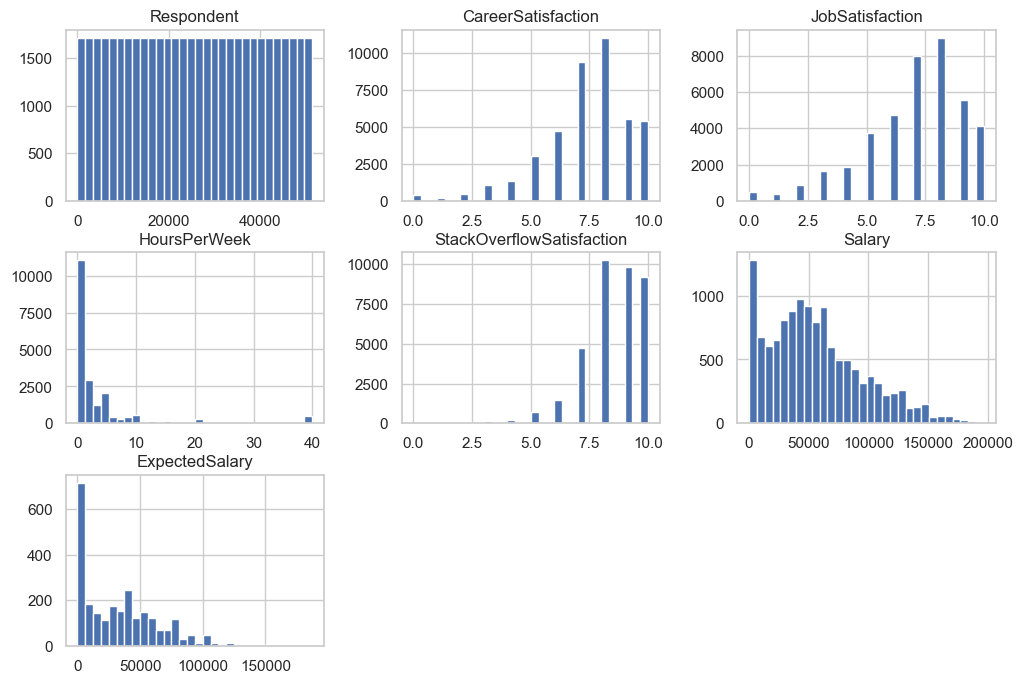

In [28]:
#I wanted a better Look at the data at first before jumping to the PReperation but i think ive got some good insights now
import matplotlib.pyplot as plt
df.hist(figsize=(12, 8), bins=30)
plt.show()

# 3 Data Preparation
Here i clean the Data for the Reasearch i want to do aka the values i already defined before
Thats pretty much it, the only thing i could do is dropping the rest of the values to minimize the data and only use data i actually need to make everything go faster
the Reason i need to drop the missing Values is to secure the accuracy of the data sinced i get weirtd values with the included

# Missing Values

First i eliminate the NAN Values ive seen before, since there are just way too many unfortunately. <br>
i considered filling them with fillna() but it would fill the data with zero values and this would lower the average immensly<br>
filling them with mewan value basically gives me the same result as the average since it also uses the average to fill the gaps. i think its faking the values because the really highpaid individuals would influence the lower ones too much.<br>

u cant really fill genders so those had to dissapear too,<br>
i could let the countries stay bvut i focus on the top X countries and this way they would dissapear anyway.<br>
<br>
since there are no duplicates i dont need to eliminate them <br>
and the data type is usable for my case so i dont need to convert those <br>
so this part is rather short <br>


In [29]:
df = df.dropna(subset=['YearsProgram', 'Salary','Gender', 'Country', 'Overpaid'])
df = df[['YearsProgram', 'Gender', 'Salary', 'Country','Overpaid']]
print(df.columns.tolist()) #to check if it worked

['YearsProgram', 'Gender', 'Salary', 'Country', 'Overpaid']


# 4. Modeling
Now that i prepared my data i can start with the modeling for the user
first i sort the values descending based on the average salary
<br><br>
  # Question 1   <br>
  Is There a difference in pay by the years in the field or is there a point where it even stops increasing

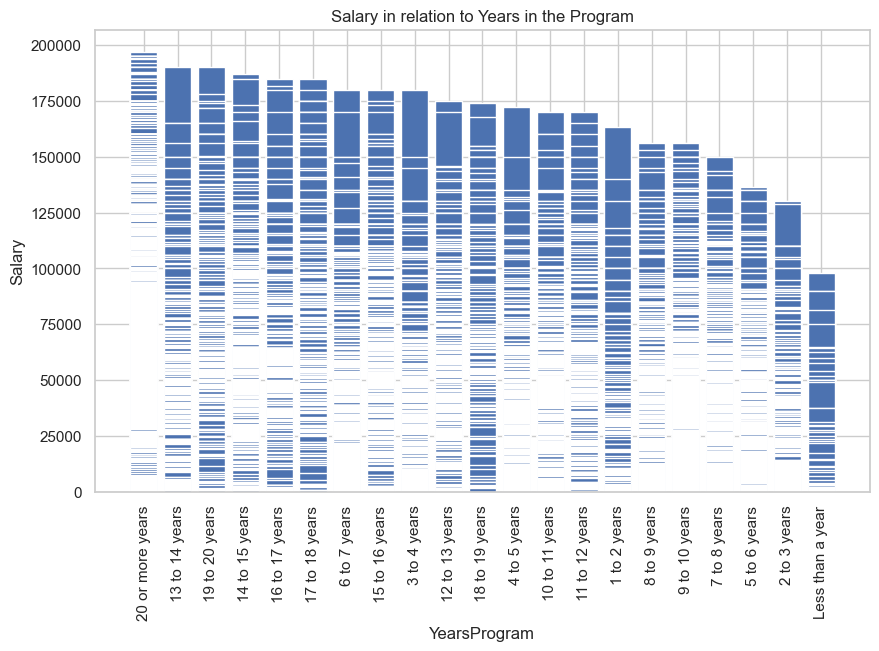

In [30]:
def plot_salary_vs_years(df, sort_by='Salary'):
    """
    Sorts the DataFrame by a specified column and creates a bar chart
    showing the relationship between 'YearsProgram' and 'Salary'.
    
    Parameters:
    df (pd.DataFrame): The DataFrame containing the data.
    sort_by (str): The column to sort by (default is 'Salary').
    """
    # Sort the DataFrame by the specified column
    df = df.sort_values(by=sort_by, ascending=False)
    
    # Create the bar chart
    plt.bar(df['YearsProgram'], df['Salary'])
    plt.title(f'{sort_by} in relation to Years in the Program')
    plt.xlabel('YearsProgram')
    plt.ylabel('Salary')
    plt.xticks(rotation=90)  # Rotate the x-axis labels for readability
    plt.show()

# Example: Calling the function to plot salary vs years
plot_salary_vs_years(df)


ok like i thought years in the field influence the results of the Salary, now im interested if gender play a role<br>
now i will look into the gender and see how pay relates to this information<br>
first as values then in a bar chart combined with the information before<br>
<br><br>
This code calculates the average salary per gender using groupby() and mean(), <br>
then sorts the results in descending order with sort_values(). <br>
Finally, it prints the sorted average salaries by gender.<br>

<br><br>
# Question 2   <br>
  Does the stereotype "females earn less" actually exist? lets check the pay by Genders

In [31]:
gender_salary_avg = df.groupby('Gender')['Salary'].mean()
gender_salary_avg_sorted = gender_salary_avg.sort_values(ascending=False)
print(gender_salary_avg_sorted)

Gender
Female; Transgender; Other                                 126000.000000
Female; Transgender; Gender non-conforming                  90750.000000
Transgender                                                 87643.985215
Male; Transgender                                           82033.030303
Female; Transgender                                         78791.988363
Female; Gender non-conforming                               69519.757125
Male; Transgender; Other                                    67500.000000
Male; Gender non-conforming; Other                          66000.000000
Gender non-conforming                                       63672.172798
Male; Gender non-conforming                                 60440.697719
Female                                                      58175.177258
Other                                                       58133.780908
Male                                                        57023.870261
Transgender; Gender non-conforming          

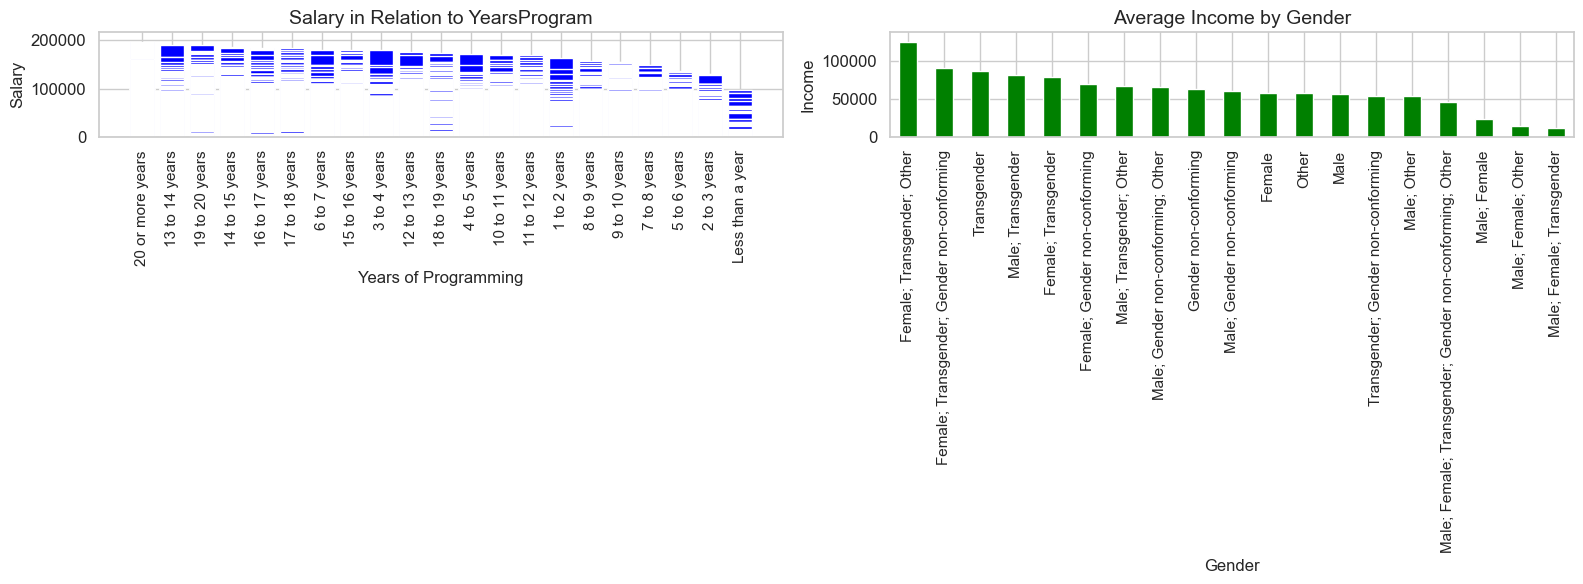

In [32]:
def plot_salary_and_gender_income(df, gender_salary_avg_sorted):
    """
    Plots two side-by-side bar charts:
    1. Salary in relation to Years of Programming (sorted by Salary).
    2. Average Income by Gender.
    
    Parameters:
    df (pd.DataFrame): The DataFrame containing the salary and YearsProgram data.
    gender_salary_avg_sorted (pd.Series): A series containing average income by gender.
    """
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))  # Wider figure for better readability
    
    # Salary vs. YearsProgram (Sorted)
    df_sorted = df.sort_values(by='Salary', ascending=False)
    axes[0].bar(df_sorted['YearsProgram'], df_sorted['Salary'], color='blue')
    axes[0].set_title('Salary in Relation to YearsProgram', fontsize=14)
    axes[0].set_xlabel('Years of Programming', fontsize=12)
    axes[0].set_ylabel('Salary', fontsize=12)
    axes[0].tick_params(axis='x', rotation=90)
    axes[0].tick_params(axis='y', labelsize=12)  # Make y-axis labels bigger
    axes[0].set_ylim(0, df_sorted['Salary'].max() * 1.1)  # Adds 10% space above max value
    
    # Average Income per Gender (Sorted)
    gender_salary_avg_sorted.plot(kind='bar', color='green', ax=axes[1])
    axes[1].set_title('Average Income by Gender', fontsize=14)
    axes[1].set_xlabel('Gender', fontsize=12)
    axes[1].set_ylabel('Income', fontsize=12)
    axes[1].tick_params(axis='x', rotation=90)
    axes[1].tick_params(axis='y', labelsize=12)  # Make y-axis labels bigger
    axes[1].set_ylim(0, gender_salary_avg_sorted.max() * 1.1)  # Adds 10% space above max value

    plt.tight_layout()  # Adjust layout for better spacing
    plt.show()

# Example usage:
# Assuming you have `df` (DataFrame) and `gender_salary_avg_sorted` (Series with avg salary by gender)
plot_salary_and_gender_income(df, gender_salary_avg_sorted)


This part im not the happiest about, i could only choose between a small y axis where i cant see everything propably<br>
or make a bigger one but i cant read the legend of the x achsis. normally i would rename the column values to a shorter format and make a legend somewhere but for this purpose its enough<br>
<br>
Interesting, Female Transgender dominate thew graph and jump to the first place by around 35 Thousand $ which is a really huge gap<br>
The Last analysis will look over the countries and what pay they receive, also i will look at which country is satisfied and unsatisfied with their pay<br>
<br><br>
# Question 3   <br>
  At Last is the pay influenced by Countries and which of those Countries is the most unhappy with their Pay

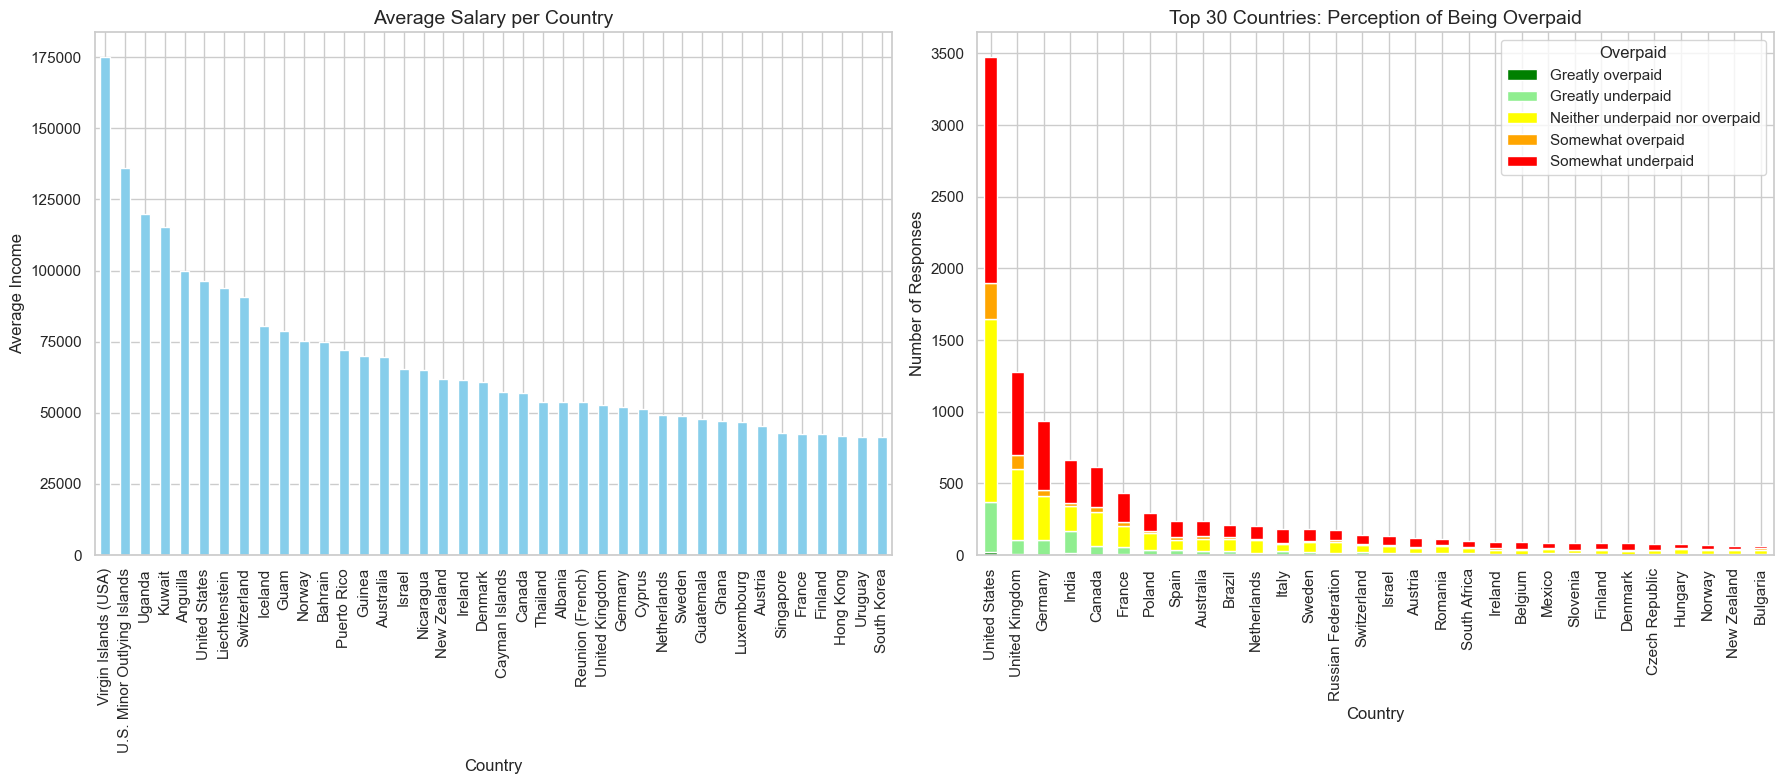

In [33]:
import matplotlib.pyplot as plt

def calculate_average_salary_by_country(df, top_n=40):
    """
    Calculates the average salary per country and returns the top_n countries.
    
    Parameters:
    df (pd.DataFrame): The DataFrame containing country and salary data.
    top_n (int): The number of top countries to return (default is 40).
    
    Returns:
    pd.Series: A sorted series of average salary per country for the top_n countries.
    """
    country_salary_avg = df.groupby('Country')['Salary'].mean()
    return country_salary_avg.sort_values(ascending=False).head(top_n)

def calculate_overpaid_perception_by_country(df, top_n=30):
    """
    Calculates the overpaid perception count per country and returns the top_n countries.
    
    Parameters:
    df (pd.DataFrame): The DataFrame containing country and overpaid data.
    top_n (int): The number of top countries to return (default is 30).
    
    Returns:
    pd.DataFrame: A DataFrame with the overpaid perception count per country.
    """
    overpaid_counts = df.groupby(['Country', 'Overpaid']).size().unstack(fill_value=0)
    overpaid_counts['Total'] = overpaid_counts.sum(axis=1)
    return overpaid_counts.sort_values(by='Total', ascending=False).head(top_n)

def plot_salary_and_overpaid(df, top_n_salary=40, top_n_overpaid=30):
    """
    Creates a subplot with two charts:
    1. Average Salary per Country (Top N countries).
    2. Overpaid Perception per Country (Top N countries with stacked bar chart).
    
    Parameters:
    df (pd.DataFrame): The DataFrame containing salary, country, and overpaid data.
    top_n_salary (int): The number of top countries for salary to be visualized (default is 40).
    top_n_overpaid (int): The number of top countries for overpaid perception to be visualized (default is 30).
    """
    # Calculate the top countries for salary and overpaid perception
    top_countries_salary = calculate_average_salary_by_country(df, top_n=top_n_salary)
    top_countries_overpaid = calculate_overpaid_perception_by_country(df, top_n=top_n_overpaid)
    
    # Create the subplots
    fig, axes = plt.subplots(1, 2, figsize=(18, 8))

    # Average Salary per Country
    top_countries_salary.plot(kind='bar', color='skyblue', ax=axes[0])
    axes[0].set_title('Average Salary per Country', fontsize=14)
    axes[0].set_xlabel('Country', fontsize=12)
    axes[0].set_ylabel('Average Income', fontsize=12)
    axes[0].tick_params(axis='x', rotation=90)

    # Overpaid perception per Country (Stacked Bar Chart)
    top_countries_overpaid.drop(columns=['Total']).plot(kind='bar', stacked=True, color=['green', 'lightgreen', 'yellow', 'orange', 'red'], ax=axes[1])
    axes[1].set_title('Top 30 Countries: Perception of Being Overpaid', fontsize=14)
    axes[1].set_xlabel('Country', fontsize=12)
    axes[1].set_ylabel('Number of Responses', fontsize=12)
    axes[1].tick_params(axis='x', rotation=90)

    plt.tight_layout()
    plt.show()

# Example usage:
plot_salary_and_overpaid(df)


Interesting, even though the USA has the Highest Paygrades its also complaining about being severely underpaid  <br>
ive set the two barcharts next to each other so it could be better analyzed, its much more pleasing for the consumer   <br>
This is it for the Data Model i will now share my insights on my Blog